## Análise dos microdados do ENEM 2022

In [1]:
# Instalação dos pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import watermark

In [2]:
# Verificando a versão dos pacotes
%reload_ext watermark
%watermark -a "Carlos Rodrigues" --iversions

Author: Carlos Rodrigues

matplotlib: 3.5.2
re        : 2.2.1
seaborn   : 0.11.2
watermark : 2.3.1
pandas    : 1.4.4
numpy     : 1.21.5



In [3]:
df = pd.read_csv("dados\MICRODADOS_ENEM_2022.csv",sep=';',encoding='ISO-8859-1')

In [4]:
df.shape

(3476105, 76)

In [5]:
# Verificando os tipos de dados de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476105 entries, 0 to 3476104
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [6]:
# Aumentando a visualização de linhas
pd.options.display.max_rows = 100

In [7]:
# Verificando se há valores nulos
df.isnull().sum()

NU_INSCRICAO                    0
NU_ANO                          0
TP_FAIXA_ETARIA                 0
TP_SEXO                         0
TP_ESTADO_CIVIL                 0
TP_COR_RACA                     0
TP_NACIONALIDADE                0
TP_ST_CONCLUSAO                 0
TP_ANO_CONCLUIU                 0
TP_ESCOLA                       0
TP_ENSINO                 2213361
IN_TREINEIRO                    0
CO_MUNICIPIO_ESC          2524161
NO_MUNICIPIO_ESC          2524161
CO_UF_ESC                 2524161
SG_UF_ESC                 2524161
TP_DEPENDENCIA_ADM_ESC    2524161
TP_LOCALIZACAO_ESC        2524161
TP_SIT_FUNC_ESC           2524161
CO_MUNICIPIO_PROVA              0
NO_MUNICIPIO_PROVA              0
CO_UF_PROVA                     0
SG_UF_PROVA                     0
TP_PRESENCA_CN                  0
TP_PRESENCA_CH                  0
TP_PRESENCA_LC                  0
TP_PRESENCA_MT                  0
CO_PROVA_CN               1120710
CO_PROVA_CH                982663
CO_PROVA_LC   

In [8]:
pd.options.display.max_columns = 76

In [9]:
# Verificando as 5 primeiras linhas
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2925758,Presidente Tancredo Neves,29,BA,1,1,1,1,1087.0,1056.0,1066.0,1078.0,421.1,546.0,498.8,565.3,DCDCEBADDABEDBCBEAEACCDDECEEBECBECAAECDDDDBCE,DBDABCADADECACBDCCEDACCCECDDABDCEADABCBCBAEAB,ABEABADCCADCAAAACDADDCECBAAACADABDEBCBCAAACEB,BDEBACECBCAEBABEDBABDACBCABCDEDEADBAABCBEACCD,1,DDECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,ECBABCDDAAECBCBECAEBAEACDEEDABBCDDEABCEDAAADB,DECDBDCEAADDBCABEDCAAADCCECEEBABEEAAABDBCCCABE...,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.0,140.0,200.0,120.0,140.0,160.0,760.0,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3201308,Cariacica,32,ES,1,1,1,1,1088.0,1058.0,1067.0,1077.0,490.7,388.6,357.8,416.0,BACBBABBCAABCABBCBACBCBCBACABACABCBDBCBABAACA,BBCAACACDCABCBACCABABCBACBCABBBBBABCBACCBCBBA,ABACCCCBCBAADABBBACABBAABACCBCBBCDCACABABCAAC,BBBACCBABABBBBACDABBBBABCCBBCABBBBAACABBACBCB,1,DDCBBCCDDAADBAABEDABCEEAEBAEBECBDDEBEACCEACCD,CEDAAADBAECBCDDADEABCBECAEEDAEBABBCDECBABEACD,CDBEDACDEACAABDBDBDDCABEEECEABECABEEAAACBBEBAD...,CCCCBXCBABECBEABDDDBDECDBDCAACEECCEBDBAAAEDAE,1.0,120.0,40.0,40.0,100.0,20.0,320.0,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1506203,Salinópolis,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A


In [10]:
# Verificando uma amostra dos dados
df.sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1089244,210054850497,2022,3,F,1,3,1,2,0,3,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2906501,Candeias,29,BA,1,1,1,1,1085.0,1057.0,1068.0,1075.0,423.1,492.9,394.8,371.8,AECDBEBCBAB*EACECDAABCAEDDCCCAECABBEEBBEDBEEB,CBBECEDEDCACBACEDAD*EACCDBACABDEEBCEAEBADADAE,DDABEABBDBBAEECAEBAAEAABDDAEBBBACABEEDABABECC,DEBDCAABBAEECBECAEAEEBCABAECDCDCCAEEBADCCBEAA,0,ADBADABEABCEEEACCBDDADDCBBCCAEBAEBEBEACCCDDDE,CBECABBCDEACDCEDAAADBCDDAECBABAECBEBAEEDADEAB,BDECDAADCECCCDCCEBACBBAAAEECABABEECEBEEDCADBDB...,ECDABEBDCEECDBDCCCCBCXCBAACDBAAACEBABDDEDAEBE,1.0,100.0,100.0,80.0,120.0,80.0,480.0,E,E,C,B,4,C,A,B,B,A,A,B,A,B,A,A,A,A,B,B,A,D,A,B,B
1195556,210056128088,2022,2,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3543402,Ribeirão Preto,35,SP,1,1,1,1,1086.0,1055.0,1065.0,1076.0,409.9,526.5,590.3,475.6,EABCDDBACAEAEEDBDBACEDCECDBBCAACCDBBACDECEBAA,CCACBADADBABDBEEDBEBADBDBEAACDAABACECEDEBBBCA,DDBDEBCEAEABBDBABDCCDACECDBBEAAEADADACEEBDBCE,BCDCDCDCBBAE*EEBCBDCAEDBAECACBADDBACEBDDABCBE,0,EACDDEBEACCCDABCEECBBCCAEBEDABEADBADDCBDDAAEB,DEABEEDAEBAAECBECBABCDDAAADBCEDAEACDBBCDCBECA,DCBDEEDCAAEAAACABBDBEBACCBEEECCBBDCAAADCCABEDB...,DBAAACEBEDAECCBECDEECBDCABECBEABDDCCDBDXCBAAC,1.0,120.0,200.0,120.0,120.0,120.0,680.0,E,G,C,D,3,J,B,C,C,C,A,B,B,B,A,B,A,A,B,A,B,A,A,C,B
2961682,210056079043,2022,4,F,1,2,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3552809,Taboão da Serra,35,SP,1,1,1,1,1088.0,1058.0,1067.0,1077.0,389.6,391.4,525.9,495.7,DBECDAEABDAACBECDEDAADBDCBBEABDCAADCBEADABDAB,BBDDBAECAABCABBABEEABCCBDAAEDBDDAECAEBDABAE.C,CDDEDAAD*.EDBDDEADACEBAADAEBBAEEEACBCABADACCA,ECCDADEBCCADBADBEBEBAEDEADBABACADDAEDEABCEDAA,1,DDCBBCCDDAADBAABEDABCEEAEBAEBECBDDEBEACCEACCD,CEDAAADBAECBCDDADEABCBECAEEDAEBABBCDECBABEACD,CDBEDACDEACAABDBDBDDCABEEECEABECABEEAAACBBEBAD...,CCCCBXCBABECBEABDDDBDECDBDCAACEECCEBDBAAAEDAE,1.0,100.0,120.0,120.0,120.0,100.0,560.0,C,B,C,B,4,C,A,B,C,B,B,B,B,B,A,B,A,A,B,B,A,E,A,A,B
2605716,210056124424,2022,3,F,1,0,1,2,0,2,1.0,0,3550308.0,São Paulo,35.0,SP,2.0,1.0,1.0,3550308,São Paulo,35,SP,1,1,1,1,1087.0,1056.0,1066.0,1078.0,471.4,508.1,540.6,443.9,ACDDCCBBECAEBBCBEECCCABDDEADDCBDCECAABEBDBAEB,EAAABAEDBDEBAABECEDCABDCAEACBAEADCAACCACDEBDC,CCEABCDBCAEADDAADDBDECECEBAACBAEBDECDDAABECBB,BBECECDCADABECDDCEBCEBDAAACDEBDECDBCBDBCBBCDA,1,DDECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,ECBABCDDAAECBCBECAEBAEACDEEDABBCDDEABCEDAAADB,DECDBDCEAADDBCABEDCAAADCCECEEBABEEAAABDBCCCABE...,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.0,100.0,120.0,100.0,120.0,40.0,480.0,F,F,D,D,5,E,A,C,C,C,A,B,B,B,A,B,A,B,C,A,A,E,A,A,B
1597671,210056663128,2022,2,F,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3304557,Rio de Janeiro,33,RJ,1,1,1,1,1087.0,1056.0,1066.0,1078.0,422.6,538.3,566.4,525.6,ADDADCCBECBABBBDBAEBDDCDDCBADEEACEBBAABAEDBBE,EDBABEDADBDBADBDEAECACADDCADBCBDAACACDCCAAEDD,DDDDBDEBCADADEAEADACECEEBBBAECBABDECEDACAEDCB,CAEBADCDBDBEBACECACABDCEDBBEEDCEAEBCDBCDCDECD,0,DDECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,ECBABCDDAAECBCBECAEBAEACDEEDABBCDDEABCEDAAADB,DECDBDCEAADDBCABEDCAAADCCECEEBABEEAAABDBCCCABE...,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.0,120.0,140.0,120.0,120.0,120.0,620.0,H,E,F,D,4,D,A,C,E,A,A,C,C,B,A,B,A,B,E,B,A,E,B,B,B


### EDA- Parte 1

#### Separação das Variáveis Categóricas e Numéricas

In [11]:
df.dtypes

NU_INSCRICAO                int64
NU_ANO                      int64
TP_FAIXA_ETARIA             int64
TP_SEXO                    object
TP_ESTADO_CIVIL             int64
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
CO_MUNICIPIO_ESC          float64
NO_MUNICIPIO_ESC           object
CO_UF_ESC                 float64
SG_UF_ESC                  object
TP_DEPENDENCIA_ADM_ESC    float64
TP_LOCALIZACAO_ESC        float64
TP_SIT_FUNC_ESC           float64
CO_MUNICIPIO_PROVA          int64
NO_MUNICIPIO_PROVA         object
CO_UF_PROVA                 int64
SG_UF_PROVA                object
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
TP_PRESENCA_MT              int64
CO_PROVA_CN               float64
CO_PROVA_CH               float64
CO_PROVA_LC   

In [12]:
# Lista de colunas categóricas
cats = [ 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ESCOLA',
        'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
        'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT','TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']

In [13]:
nums = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO']

### Seleção de variáveis que participarão da análise

In [14]:
''' Não participarão da análise as variáveis por irrelevância NU_INSCRICAO, NU_ANO, IN_TREINEIRO, CO_MUNICIPIO_ESC , CO_UF_ESC, \
CO_PROVA_CN ,CO_PROVA_CH ,CO_PROVA_LC ,CO_PROVA_MT, TX_RESPOSTAS_CN, TX_RESPOSTAS_CH,TX_RESPOSTAS_LC, TX_RESPOSTAS_MT, \
TX_GABARITO_CN, TX_GABARITO_CH, TX_GABARITO_LC, TX_GABARITO_MT , TP_STATUS_REDACAO*'''

' Não participarão da análise as variáveis por irrelevância NU_INSCRICAO, NU_ANO, IN_TREINEIRO, CO_MUNICIPIO_ESC , CO_UF_ESC, CO_PROVA_CN ,CO_PROVA_CH ,CO_PROVA_LC ,CO_PROVA_MT, TX_RESPOSTAS_CN, TX_RESPOSTAS_CH,TX_RESPOSTAS_LC, TX_RESPOSTAS_MT, TX_GABARITO_CN, TX_GABARITO_CH, TX_GABARITO_LC, TX_GABARITO_MT , TP_STATUS_REDACAO*'

'''Devido ao alto número de registros ausentes, iremos excluir da análise as variáveis TP_ENSINO*, NO_MUNICIPIO_ESC, SG_UF_ESC, TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC, 'TP_SIT_FUNC_ESC'''

In [15]:
# Lista de colunas categóricas
cats = ['TP_FAIXA_ETARIA', 'TP_SEXO','TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE','TP_ESCOLA','TP_ST_CONCLUSAO',\
        'TP_ANO_CONCLUIU', 'NO_MUNICIPIO_ESC', 'CO_MUNICIPIO_PROVA','SG_UF_PROVA','TP_PRESENCA_CN', 'TP_PRESENCA_CH',\
        'TP_PRESENCA_LC','TP_PRESENCA_MT', 'TP_LINGUA','TP_STATUS_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']

In [16]:
nums = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO']

### Explorando as variáveis numéricas

In [17]:
df[nums].isnull().sum()

NU_NOTA_CN         1120710
NU_NOTA_CH          982663
NU_NOTA_LC          982663
NU_NOTA_MT         1120710
NU_NOTA_COMP1       982663
NU_NOTA_COMP2       982663
NU_NOTA_COMP3       982663
NU_NOTA_COMP4       982663
NU_NOTA_COMP5       982663
NU_NOTA_REDACAO     982663
dtype: int64

In [18]:
# Excluindo os valores ausentes
dfNumsLimpos = df[nums].dropna()
dfNumsLimpos

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
2,421.1,546.0,498.8,565.3,140.0,200.0,120.0,140.0,160.0,760.0
3,490.7,388.6,357.8,416.0,120.0,40.0,40.0,100.0,20.0,320.0
7,398.1,427.3,400.2,404.9,100.0,120.0,80.0,100.0,40.0,440.0
9,467.5,461.0,466.7,435.3,80.0,80.0,80.0,80.0,40.0,360.0
11,458.7,539.8,488.2,456.8,160.0,200.0,180.0,200.0,200.0,940.0
...,...,...,...,...,...,...,...,...,...,...
3476095,444.5,504.4,489.5,423.6,120.0,120.0,120.0,120.0,100.0,580.0
3476097,536.1,633.2,584.0,596.3,140.0,200.0,160.0,120.0,120.0,740.0
3476098,487.6,495.6,545.5,597.4,120.0,140.0,120.0,120.0,80.0,580.0
3476099,512.5,524.8,546.8,432.0,120.0,160.0,100.0,100.0,40.0,520.0


In [19]:
# Alterando a forma de exibição numérica de exponecial para float
pd.set_option('float_format','{:.3f}'.format)

In [20]:
# Resumo das variáveis numéricas
dfNumsLimpos.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,2344823.000,2344823.000,2344823.000,2344823.000,2344823.000,2344823.000,2344823.000,2344823.000,2344823.000,2344823.000
mean,496.017,529.969,519.877,542.611,121.078,143.335,116.739,131.489,116.309,628.950
std,71.940,79.621,76.219,115.958,35.226,51.874,39.585,40.973,58.901,204.131
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,440.600,480.200,471.400,449.100,120.000,120.000,100.000,120.000,80.000,540.000
50%,485.700,532.600,527.800,531.000,120.000,140.000,120.000,120.000,120.000,640.000
75%,543.400,584.100,574.900,622.500,140.000,200.000,140.000,160.000,160.000,780.000
max,875.300,839.200,801.000,985.700,200.000,200.000,200.000,200.000,200.000,1000.000


<AxesSubplot:>

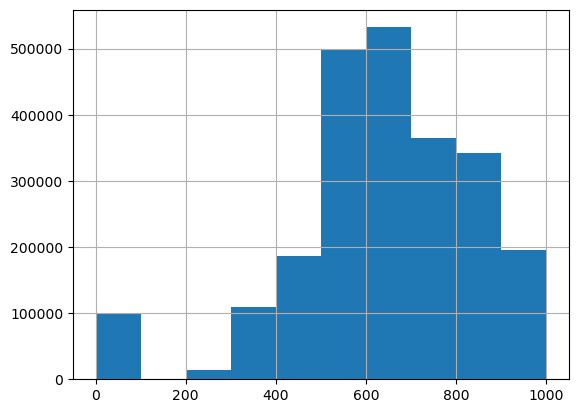

In [21]:
dfNumsLimpos['NU_NOTA_REDACAO'].hist()

<AxesSubplot:>

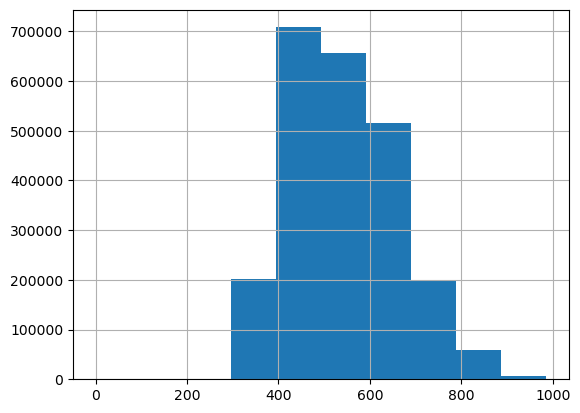

In [22]:
dfNumsLimpos['NU_NOTA_MT'].hist()

### Explorando as variáveis categóricas

In [23]:
# Filtrando o dataset somente com as variáveis categóricas
df = df[cats].astype(object)

In [24]:
df[cats].isnull().sum()

TP_FAIXA_ETARIA             0
TP_SEXO                     0
TP_ESTADO_CIVIL             0
TP_COR_RACA                 0
TP_NACIONALIDADE            0
TP_ESCOLA                   0
TP_ST_CONCLUSAO             0
TP_ANO_CONCLUIU             0
NO_MUNICIPIO_ESC      2524161
CO_MUNICIPIO_PROVA          0
SG_UF_PROVA                 0
TP_PRESENCA_CN              0
TP_PRESENCA_CH              0
TP_PRESENCA_LC              0
TP_PRESENCA_MT              0
TP_LINGUA                   0
TP_STATUS_REDACAO      982663
Q001                        0
Q002                        0
Q003                        0
Q004                        0
Q005                        0
Q006                        0
Q007                        0
Q008                        0
Q009                        0
Q010                        0
Q011                        0
Q012                        0
Q013                        0
Q014                        0
Q015                        0
Q016                        0
Q017      

In [25]:
df[cats].dtypes

TP_FAIXA_ETARIA       object
TP_SEXO               object
TP_ESTADO_CIVIL       object
TP_COR_RACA           object
TP_NACIONALIDADE      object
TP_ESCOLA             object
TP_ST_CONCLUSAO       object
TP_ANO_CONCLUIU       object
NO_MUNICIPIO_ESC      object
CO_MUNICIPIO_PROVA    object
SG_UF_PROVA           object
TP_PRESENCA_CN        object
TP_PRESENCA_CH        object
TP_PRESENCA_LC        object
TP_PRESENCA_MT        object
TP_LINGUA             object
TP_STATUS_REDACAO     object
Q001                  object
Q002                  object
Q003                  object
Q004                  object
Q005                  object
Q006                  object
Q007                  object
Q008                  object
Q009                  object
Q010                  object
Q011                  object
Q012                  object
Q013                  object
Q014                  object
Q015                  object
Q016                  object
Q017                  object
Q018          

In [26]:
# Resumo das variáveis numéricas
df[cats].describe()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,NO_MUNICIPIO_ESC,CO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_LINGUA,TP_STATUS_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,951944,3476105,3476105,3476105,3476105,3476105,3476105,3476105,2493442.000,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105,3476105
unique,20,2,5,6,5,3,4,17,5265,1747,27,3,3,3,3,2,8.000,8,8,6,6,20,17,4,5,5,5,5,5,5,5,5,5,5,2,5,2,2,5,2,5,2
top,3,F,1,3,1,1,1,0,São Paulo,3550308,SP,1,1,1,1,0,1.000,E,E,C,B,4,B,A,B,C,A,A,B,A,B,A,B,A,A,B,A,A,D,A,A,B
freq,805862,2120519,3127949,1488844,3393163,2158545,1633253,2005683,46819,147046,544442,2355395,2493442,2493442,2355395,1900028,2363615.000,1002676,1217025,803761,1418325,1150237,1022869,3171295,2242899,1711388,1786665,2612969,3229827,1851450,2190393,3002575,1739763,3357031,2613530,2247418,2886368,2681865,1056875,3049683,1606940,3149732


In [27]:
# Listando o total de registros por categoria de cada variável categórica
for col in cats:
    print(f'Total de Registros por categoria da variável {col}:')
    print(df[col].value_counts())
    print()

Total de Registros por categoria da variável TP_FAIXA_ETARIA:
3     805862
2     711278
4     408115
1     303605
5     247679
11    189700
6     165982
7     123260
12    103634
8      94849
13     74162
9      73338
10     61564
14     49735
15     30066
16     17688
17      9688
18      3817
19      1505
20       578
Name: TP_FAIXA_ETARIA, dtype: int64

Total de Registros por categoria da variável TP_SEXO:
F    2120519
M    1355586
Name: TP_SEXO, dtype: int64

Total de Registros por categoria da variável TP_ESTADO_CIVIL:
1    3127949
2     165719
0     128493
3      50380
4       3564
Name: TP_ESTADO_CIVIL, dtype: int64

Total de Registros por categoria da variável TP_COR_RACA:
3    1488844
1    1428081
2     408422
4      66051
0      64867
5      19840
Name: TP_COR_RACA, dtype: int64

Total de Registros por categoria da variável TP_NACIONALIDADE:
1    3393163
2      68522
4       7044
3       5760
0       1616
Name: TP_NACIONALIDADE, dtype: int64

Total de Registros por categoria 

### Análise Univariada - Boxplots


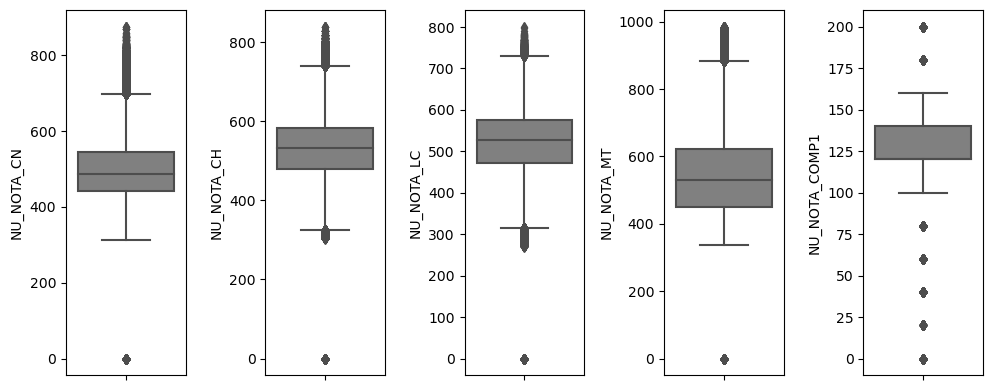

In [32]:
plt.subplots(figsize=(20,4))
for i in range(0, 5):
    plt.subplot(1, len(nums), i + 1)
    sns.boxplot(y = dfNumsLimpos[nums[i]], color = 'gray', orient = 'v')
    plt.tight_layout()


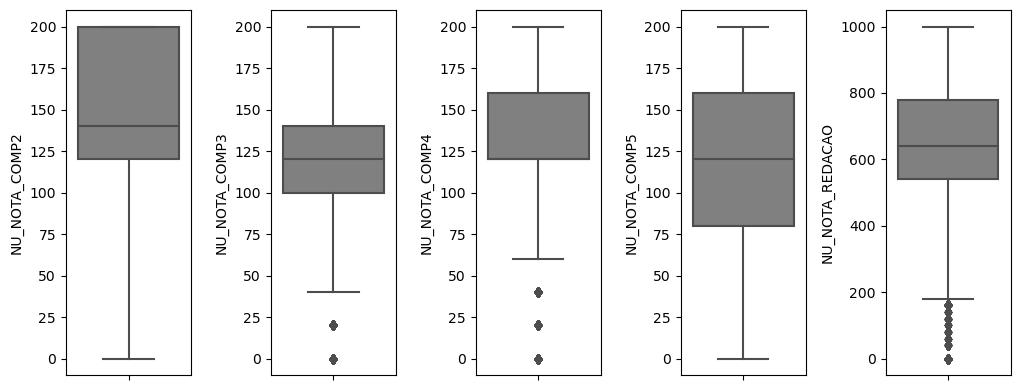

In [31]:
plt.subplots(figsize=(20,4))
for i in range(5, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.boxplot(y = dfNumsLimpos[nums[i]], color = 'gray', orient = 'v')
    plt.tight_layout()


### Análise Univariada - Dist Plot

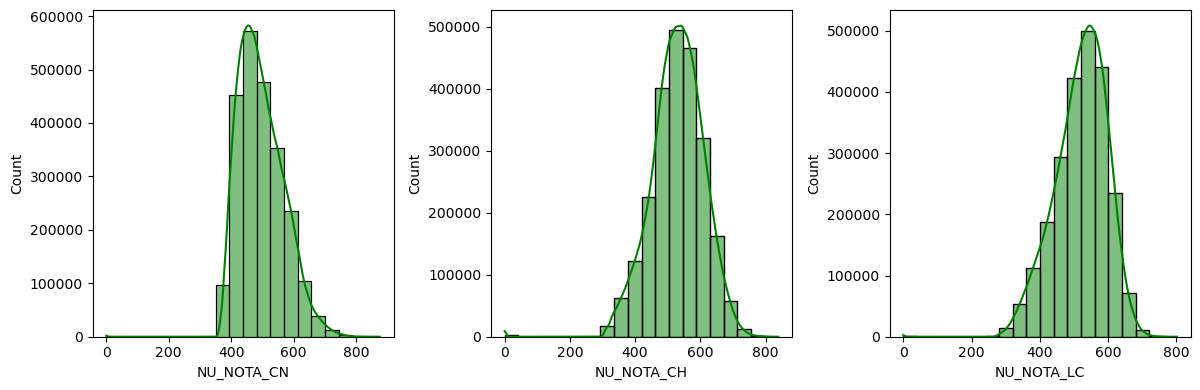

In [118]:
plt.subplots(figsize=(40,4))
for i in range(0,3):
    plt.subplot(1, len(nums), i + 1)
    sns.histplot(x = dfNumsLimpos[nums[i]], color = 'green', kde=True, bins=20)
    plt.tight_layout()

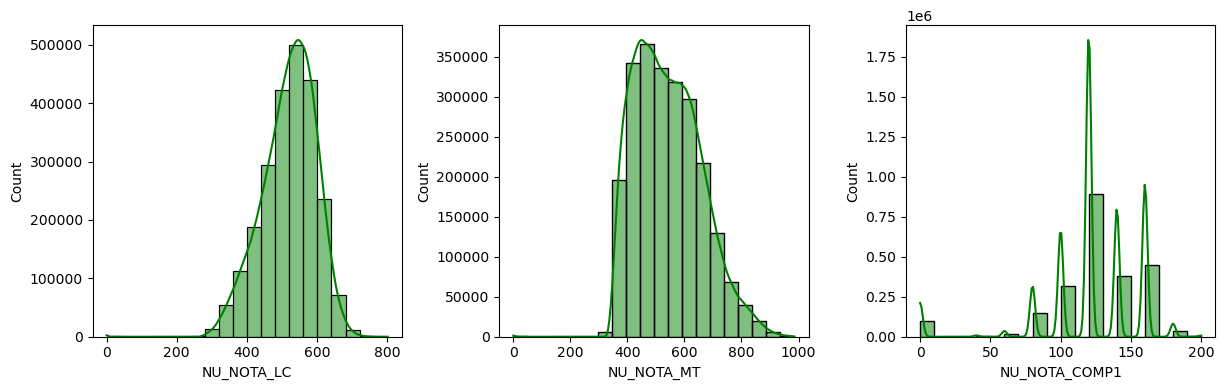

In [119]:
plt.subplots(figsize=(40,4))
for i in range(2,5):
    plt.subplot(1, len(nums), i + 1)
    sns.histplot(x = dfNumsLimpos[nums[i]], color = 'green', kde=True, bins=20)
    plt.tight_layout()

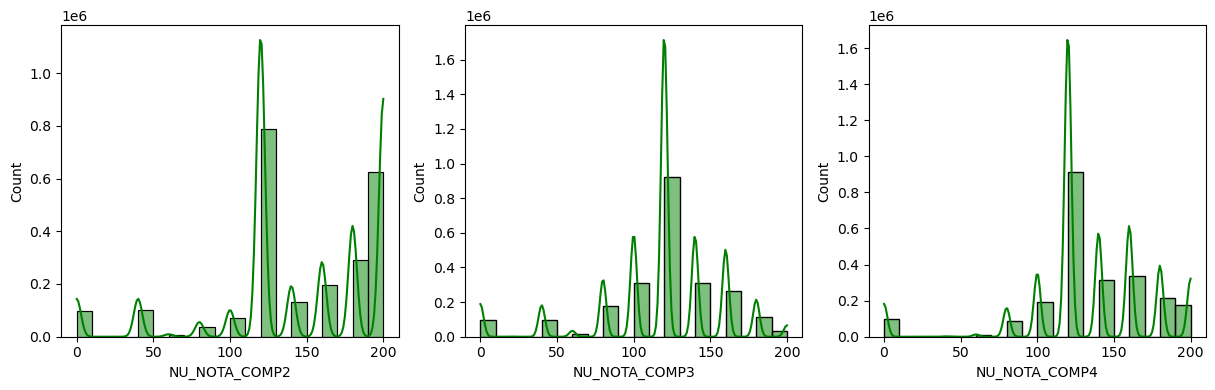

In [120]:
plt.subplots(figsize=(40,4))
for i in range(5,8):
    plt.subplot(1, len(nums), i + 1)
    sns.histplot(x = dfNumsLimpos[nums[i]], color = 'green', kde=True, bins=20)
    plt.tight_layout()

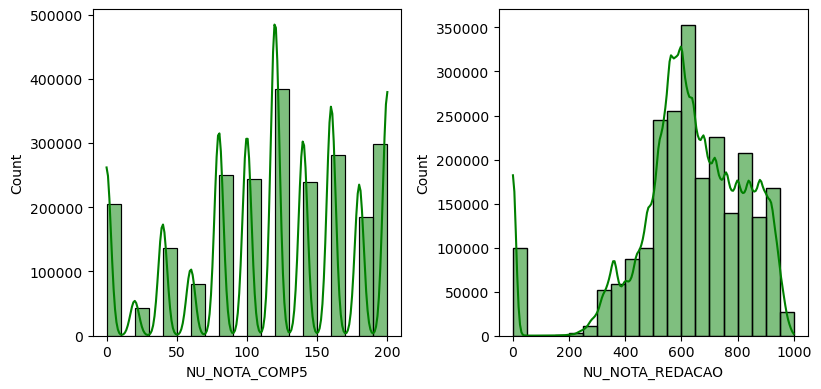

In [121]:
plt.subplots(figsize=(40,4))
for i in range(8,10):
    plt.subplot(1, len(nums), i + 1)
    sns.histplot(x = dfNumsLimpos[nums[i]], color = 'green', kde=True, bins=20)
    plt.tight_layout()

### Análise Univariada - Count Plot (Variáveis categórica)

In [126]:
# Eliminando os registros nulos da variáveis categóricas
dfCatsLimpos = df[cats].dropna()
dfCatsLimpos


,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,NO_MUNICIPIO_ESC,CO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_LINGUA,TP_STATUS_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
40,5,F,1,3,1,2,2,0,Aracati,2301109,CE,1,1,1,1,1,1.000,C,D,C,B,4,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
55,3,F,1,1,1,2,2,0,São Paulo,3515004,SP,1,1,1,1,0,1.000,D,F,B,D,4,E,A,B,C,B,A,B,B,B,A,A,A,A,B,A,A,E,A,B,B
57,2,M,1,3,1,2,2,0,Goianésia,5208608,GO,1,1,1,1,0,1.000,C,D,F,C,4,F,B,E,D,B,A,B,A,C,A,A,A,A,C,A,A,E,A,C,B
59,3,F,1,3,1,2,2,0,Santarém,1506807,PA,1,1,1,1,1,1.000,E,E,C,F,2,B,A,B,C,A,A,B,A,A,A,A,A,A,C,A,A,A,A,A,B
61,5,F,1,2,1,2,2,0,Nova Iguaçu,3305554,RJ,0,1,1,0,1,1.000,H,C,F,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,D,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476074,4,M,0,3,1,2,2,0,Pelotas,4314407,RS,1,1,1,1,1,1.000,E,E,C,C,4,B,A,B,B,A,A,B,A,B,A,A,A,A,B,A,A,B,A,A,B
3476086,2,M,1,1,1,2,2,0,São Leopoldo,4318705,RS,1,1,1,1,0,1.000,D,E,C,C,3,F,A,C,D,A,B,B,C,B,A,B,A,B,C,B,A,D,A,B,B
3476093,3,F,1,1,1,2,2,0,Nilópolis,3303203,RJ,1,1,1,1,0,1.000,E,F,C,D,4,F,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,E,A,B,B
3476098,2,M,0,3,1,2,2,0,Ipatinga,3131307,MG,1,1,1,1,0,1.000,H,E,C,B,2,B,A,B,B,A,A,B,B,B,A,A,A,A,B,A,A,C,A,A,B


In [131]:
dfCatsLimpos.describe()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,NO_MUNICIPIO_ESC,CO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_LINGUA,TP_STATUS_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581.000,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581,729581
unique,20,2,5,6,5,2,1,1,5235,1747,27,3,1,1,3,2,8.000,8,8,6,6,20,17,4,5,5,5,5,5,5,5,5,5,5,2,5,2,2,5,2,5,2
top,3,F,1,1,1,2,2,0,São Paulo,3550308,SP,1,1,1,1,0,1.000,E,E,D,B,4,B,A,B,C,B,A,B,B,B,A,B,A,A,B,A,A,D,A,A,B
freq,331835,409183,700346,345855,713129,551622,729581,729581,38244,37473,144218,692915,729581,729581,692915,451017,685837.000,234364,269765,177811,265603,273879,178518,647326,405350,341641,325672,540353,665032,369354,518628,602185,426762,694349,485912,419543,575807,512053,252361,617839,296531,678639


In [130]:
dfCatsLimpos.isnull().sum()

TP_FAIXA_ETARIA       0
TP_SEXO               0
TP_ESTADO_CIVIL       0
TP_COR_RACA           0
TP_NACIONALIDADE      0
TP_ESCOLA             0
TP_ST_CONCLUSAO       0
TP_ANO_CONCLUIU       0
NO_MUNICIPIO_ESC      0
CO_MUNICIPIO_PROVA    0
SG_UF_PROVA           0
TP_PRESENCA_CN        0
TP_PRESENCA_CH        0
TP_PRESENCA_LC        0
TP_PRESENCA_MT        0
TP_LINGUA             0
TP_STATUS_REDACAO     0
Q001                  0
Q002                  0
Q003                  0
Q004                  0
Q005                  0
Q006                  0
Q007                  0
Q008                  0
Q009                  0
Q010                  0
Q011                  0
Q012                  0
Q013                  0
Q014                  0
Q015                  0
Q016                  0
Q017                  0
Q018                  0
Q019                  0
Q020                  0
Q021                  0
Q022                  0
Q023                  0
Q024                  0
Q025            

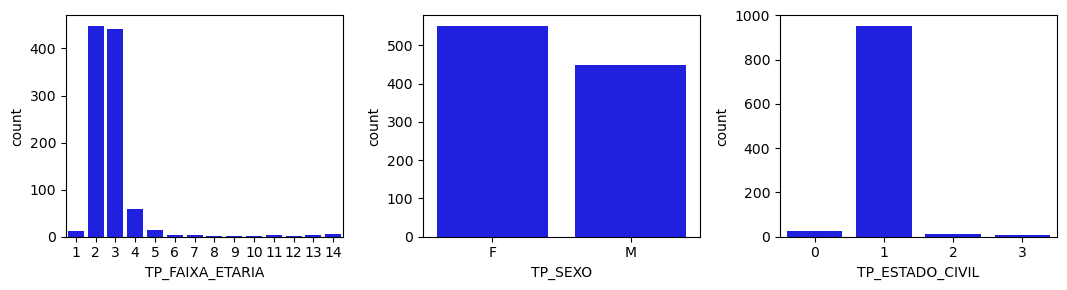

In [187]:
dfCatsLimposSample = dfCatsLimpos.sample(1000, random_state = 42)
plt.subplots(figsize=(150,3))
for i in range(0,3):
    plt.subplot(1,  len(cats), i + 1)
    sns.countplot(x = dfCatsLimposSample[cats[i]], color = 'blue', orient= 'v')
    plt.tight_layout()

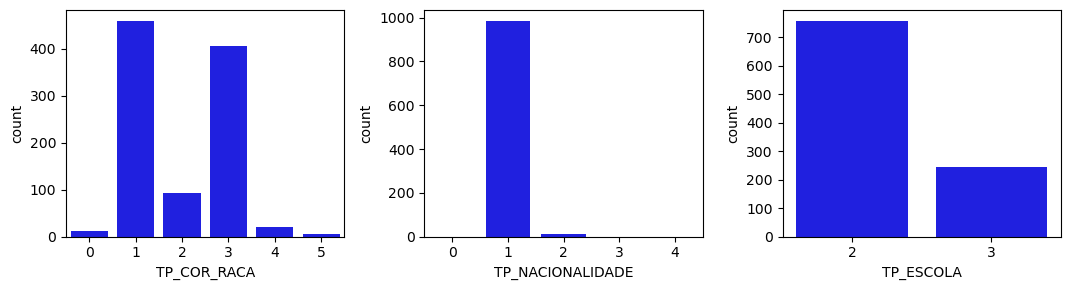

In [188]:
dfCatsLimposSample = dfCatsLimpos.sample(1000, random_state = 42)
plt.subplots(figsize=(150,3))
for i in range(3,6):
    plt.subplot(1,  len(cats), i + 1)
    sns.countplot(x = dfCatsLimposSample[cats[i]], color = 'blue', orient= 'v')
    plt.tight_layout()

### Análise Bivariada - Mapa de Correlação

In [203]:
dfNumsLimpos.corr()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
NU_NOTA_CN,1.000,0.601,0.567,0.605,0.382,0.362,0.402,0.392,0.403,0.431
NU_NOTA_CH,0.601,1.000,0.733,0.621,0.453,0.427,0.462,0.447,0.459,0.498
NU_NOTA_LC,0.567,0.733,1.000,0.589,0.476,0.435,0.467,0.444,0.455,0.504
NU_NOTA_MT,0.605,0.621,0.589,1.000,0.433,0.407,0.445,0.441,0.449,0.482
NU_NOTA_COMP1,0.382,0.453,0.476,0.433,1.000,0.726,0.803,0.845,0.651,0.870
NU_NOTA_COMP2,0.362,0.427,0.435,0.407,0.726,1.000,0.844,0.774,0.738,0.911
NU_NOTA_COMP3,0.402,0.462,0.467,0.445,0.803,0.844,1.000,0.834,0.746,0.930
NU_NOTA_COMP4,0.392,0.447,0.444,0.441,0.845,0.774,0.834,1.000,0.733,0.916
NU_NOTA_COMP5,0.403,0.459,0.455,0.449,0.651,0.738,0.746,0.733,1.000,0.880
NU_NOTA_REDACAO,0.431,0.498,0.504,0.482,0.870,0.911,0.930,0.916,0.880,1.000


<AxesSubplot:>

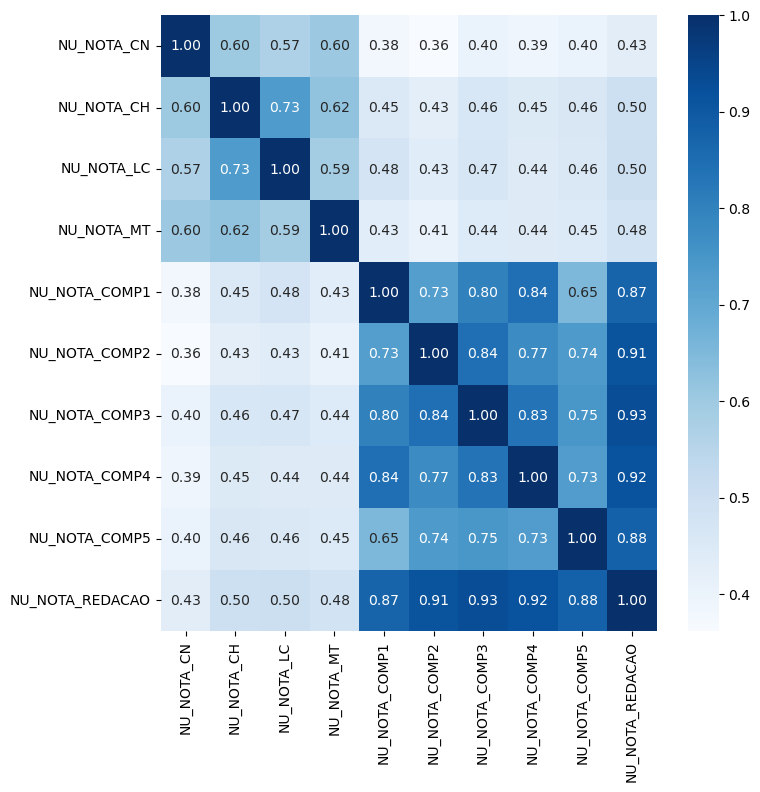

In [211]:
plt.figure(figsize = (8,8))
sns.heatmap(dfNumsLimpos[nums].corr(), cmap= 'Blues', annot = True, fmt ='.2f', )

### Colunas categóricas x variável para estudo

In [ ]:
plt.figure(figsize=(200,3))
for i in range(0, 4):
    plt.subplot(4, 1, i + 1)
    sns.countplot(data = dfCatsLimpos, x = cats[i], hue = "TP_SEXO")


### Conclusão da EDA 1

'''Depois de uma primeira análise das variáveis, chegamos as seguintes conclusões:
    - Realizamos a exclusão de vários registros do dataset por apresentarem valores NAN, principalmente na variáveis categóricas
isso pode comprometer a precisão da análise
    - Conforme esperado, há uma alta correlação entre as variáveis NU_NOTA_COMP1 a 5 com a variável NU_NOTA_REDACAO, devido ao 
fato de elas fazerem parte da mesma avaliação
    - Detgectamos através da análçises de boxplots que existem vários outlies praticamente em todas as variáveis numéricas '''

## EDA - Parte 2 - Análise de negócios

### 1 - Quais foram as médias de desempenho nas diferentes áreas do conhecimento (linguagens, matemática, ciências humanas, ciências da natureza e redação) no enem 2022?

In [260]:
dfNumsLimpos.columns

Index(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO'],
      dtype='object')

In [271]:
mediaLinguagensCodigos = (dfNumsLimpos['NU_NOTA_LC'].sum() / dfNumsLimpos.shape[0] ) + 100
mediaLinguagensCodigos

619.8768315135085

### 2 - Quais foram as notas médias obtidas pelos estudantes nas redações do Enem e como essas notas variaram ao longo do tempo?

### 3 - Quais são as principais diferenças de desempenho entre os estados ou regiões do país?

### 4 - Existe uma correlação entre a renda familiar dos estudantes e suas notas no Enem?

### 5 - Quais são as áreas do conhecimento em que os estudantes apresentam maior dificuldade ou menor desempenho?

### 6 - Há alguma relação entre a carga horária das escolas e o desempenho dos alunos no Enem?

### 7 - Qual é o perfil socioeconômico dos candidatos que obtêm as melhores notas no Enem?

### 8 - Existe alguma correlação entre a nota do Enem e o acesso dos estudantes ao ensino superior?

### 9 - Como as notas dos estudantes do ensino público se comparam com as notas dos estudantes do ensino privado?

### 10 - Quais são os principais fatores que influenciam o desempenho dos estudantes no Enem, como o nível de escolaridade dos pais, o acesso à internet ou a disponibilidade de bibliotecas?